In [270]:
import pandas as pd

In [271]:
ameriflux = pd.read_csv('AMF_PE-QFR_FLUXNET_FULLSET_YY_2018-2019_3-5.csv',na_values=-9999) # Dados da AMERIFLUX
modis = pd.read_csv('Npp_500m.csv',header=None)
modis.head()

,0,1,2,3,4,5,6,7,8,9,...,284,285,286,287,288,289,290,291,292,293
0,MOD17A3HGF.A2001001.h10v09.006.2020136134928.N...,MOD17A3HGF,A2001001,Lat-3.834436Lon-73.31897Samp17Line17,2020136134928,13472.0,13971.0,32762.0,7894.0,6224.0,...,13670.0,13714.0,13620.0,13495.0,13264.0,13435.0,13678.0,12920.0,13914.0,13862.0
1,MOD17A3HGF.A2002001.h10v09.006.2020143160632.N...,MOD17A3HGF,A2002001,Lat-3.834436Lon-73.31897Samp17Line17,2020143160632,13789.0,13419.0,32762.0,7458.0,7034.0,...,13104.0,13390.0,12752.0,13074.0,13083.0,13286.0,13010.0,12991.0,13017.0,13177.0
2,MOD17A3HGF.A2003001.h10v09.006.2020168120335.N...,MOD17A3HGF,A2003001,Lat-3.834436Lon-73.31897Samp17Line17,2020168120335,12930.0,12922.0,32762.0,7090.0,7419.0,...,12582.0,12675.0,12775.0,12463.0,12455.0,12167.0,12111.0,12674.0,12651.0,12761.0
3,MOD17A3HGF.A2004001.h10v09.006.2020243083315.N...,MOD17A3HGF,A2004001,Lat-3.834436Lon-73.31897Samp17Line17,2020243083315,12822.0,13037.0,32762.0,7188.0,6895.0,...,12192.0,12829.0,12206.0,12363.0,11940.0,12636.0,12329.0,12259.0,12579.0,12398.0
4,MOD17A3HGF.A2005001.h10v09.006.2020258193515.N...,MOD17A3HGF,A2005001,Lat-3.834436Lon-73.31897Samp17Line17,2020258193515,13455.0,13864.0,32762.0,7939.0,7566.0,...,12956.0,12978.0,13162.0,13180.0,13169.0,12896.0,12941.0,12892.0,13201.0,13063.0


In [272]:
modis.loc[modis[2].isin(['A2018001','A2019001'])] # Dados MODIS para o ano de 2018 e 2019

,0,1,2,3,4,5,6,7,8,9,...,284,285,286,287,288,289,290,291,292,293
17,MOD17A3HGF.A2018001.h10v09.006.2021364004127.N...,MOD17A3HGF,A2018001,Lat-3.834436Lon-73.31897Samp17Line17,2021364004127,12176.0,11588.0,32762.0,6622.0,6391.0,...,12052.0,11984.0,11975.0,12014.0,12411.0,12431.0,12027.0,12061.0,11647.0,11426.0
18,MOD17A3HGF.A2019001.h10v09.006.2021001044819.N...,MOD17A3HGF,A2019001,Lat-3.834436Lon-73.31897Samp17Line17,2021001044819,10845.0,10508.0,32762.0,5106.0,5571.0,...,10485.0,10111.0,10692.0,10243.0,10199.0,10259.0,9908.0,10596.0,11172.0,10997.0


In [273]:
ameriflux.head()

,TIMESTAMP,TA_F_MDS,TA_F_MDS_QC,TA_F_MDS_NIGHT,TA_F_MDS_NIGHT_SD,TA_F_MDS_NIGHT_QC,TA_F_MDS_DAY,TA_F_MDS_DAY_SD,TA_F_MDS_DAY_QC,TA_ERA,...,GPP_DT_VUT_SE,GPP_DT_VUT_05,GPP_DT_VUT_16,GPP_DT_VUT_25,GPP_DT_VUT_50,GPP_DT_VUT_75,GPP_DT_VUT_84,GPP_DT_VUT_95,RECO_SR,RECO_SR_N
0,2018,25.668,0.948059,24.320,1.121,0.952799,26.924,2.277,0.943653,25.628,...,18.5582,3306.78,3342.19,3366.30,3415.04,3560.11,3622.42,3652.19,NaN,NaN
1,2019,25.706,0.998973,24.335,1.145,1.000000,26.983,2.371,0.997986,25.746,...,17.8234,3189.38,3255.03,3271.45,3303.08,3356.91,3378.79,3429.99,NaN,NaN


In [274]:
npp = (ameriflux['NEE_VUT_MEAN'] + ameriflux['RECO_DT_VUT_MEAN']) / 1000 # NPP gerado pela média do RECO (DURANTE O DIA) + NEE e convertido de gC m−2 y−1 para kgC/m²/year divindo o valor por 1000
npp # NPP calculado                                               # OBS1: RECO_DT = Partitioning NEE using the daytime flux method, Lasslop et al. (2010)
                                                                  # OBS2: _VUT_ = Variable USTAR threshold for each year
                                                                  # OBS3: _MEAN = Average NEE after filtering using multiple USTAR thresholds;

0    2.526743
1    2.518219
dtype: float64

In [275]:
def convert_unit(x):
    return x/10000



modis_data = modis.loc[modis[2].isin(['A2018001','A2019001'])].copy() # Dados de NPP nos anos de 2018 e 2019


modis_data = modis_data.drop([0,1,3,4],axis=1).reset_index().drop('index',axis=1) # Retirando colunas com informações não relevantes e restabelecendo o dataframe a partir de um index 0 nas 2 linhas


modis_data.columns = range(len(modis_data.columns.to_list())) # Reiniciando o index a partir do 0 para as colunas 


modis_data.set_index(0,inplace=True) # Colocando o "Acquisition Date [ A (YYYYDDD) ]"  como index para legibilidade do dataframe


modis_data.apply(convert_unit) # Conversão para kgC/m²/year como está disposto no mapa (Adição de um 0 a mais para coincidir com o mapa do site)
# OBS: Os dados de NPP foram retirados de uma área de extensão de 8.5km[17 pixels] x 8.5km[17 pixels],
#      o que equivale a 289 (17x17) dados de NPP na área

,1,2,3,4,5,6,7,8,9,10,...,280,281,282,283,284,285,286,287,288,289
0,,,,,,,,,,,,,,,,,,,,,
A2018001,1.2176,1.1588,3.2762,0.6622,0.6391,0.6549,0.6469,3.2762,3.2762,3.2762,...,1.2052,1.1984,1.1975,1.2014,1.2411,1.2431,1.2027,1.2061,1.1647,1.1426
A2019001,1.0845,1.0508,3.2762,0.5106,0.5571,0.5418,0.5875,3.2762,3.2762,3.2762,...,1.0485,1.0111,1.0692,1.0243,1.0199,1.0259,0.9908,1.0596,1.1172,1.0997


In [276]:
modis_npp_mean = modis_data.apply(lambda x:x/10000).mean(axis=1) # Média de NPP nesses anos
modis_npp_mean

0
A2018001    1.172167
A2019001    1.078046
dtype: float64

In [277]:
modis_npp_mean_values = modis_npp_mean.values # valores do npp do modis
ameriflux_npp_values = npp.values #valores do npp do ameriflux

npp_dataframe = {
    'modis_NPP':modis_npp_mean_values,
    'ameriflux_NPP':ameriflux_npp_values
}

npp_dataframe = pd.DataFrame(npp_dataframe) # dataframe com os valores do npp
npp_dataframe

,modis_NPP,ameriflux_NPP
0,1.172167,2.526743
1,1.078046,2.518219


Text(2.518, 1.15, 'r²=1.0')

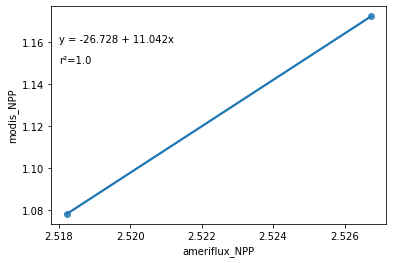

In [278]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

#gráfico com linha de regressão
p = sns.regplot(x='ameriflux_NPP',y='modis_NPP',data=npp_dataframe,ci=None)

#calculando declive, intercepto, valor r, valor p e erro padrão do declive estimado do plot acima
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#adicionando equação da regressão no plot
plt.text(2.518, 1.16, 'y = ' + str(round(intercept,3)) + ' + ' + str(round(slope,3)) + 'x')

#adicionar r² no plot
plt.text(2.518, 1.15, f'r²={r**2}')